In [1]:
import pandas as pd
df = pd.read_csv("TrazasHP_Eventos_Febrero.csv", delimiter=';')

In [68]:
level_filtered = df[df['Value.EventType'].str.contains('InicioNivelEvent') | df['Value.EventType'].str.contains('MuerteJugadorEvent') | df['Value.EventType'].str.contains('DisparoEvent')]

from collections import defaultdict
# Guarda los disparoevent por persona
accuracysSid = defaultdict(list)
# Guarda los niveles que ha empezado por run y por persona
delimiters = defaultdict(list)
# Al final se dividiran para extraer la vida perdida por nivel por run

weaponsIDs = defaultdict(list)

run = 0
current_sid = ''
for ind in level_filtered.index:
    a = str(level_filtered['Name'][ind])
    if a not in current_sid:
        run = 0
        current_sid = a
        
    if 'DisparoEvent' in level_filtered['Value.EventType'][ind]:
        weaponsIDs[current_sid].append(level_filtered['Value.Weapon'][ind])
        if level_filtered['Value.ShotCount'][ind] == 0:
            accuracysSid[current_sid].append(-1)
        elif "Shotgun" in level_filtered['Value.Weapon'][ind]:
            accuracysSid[current_sid].append(level_filtered['Value.Hits'][ind] / level_filtered['Value.ShotCount'][ind] / 4)
        elif "Rafagas" in level_filtered['Value.Weapon'][ind]:
            accuracysSid[current_sid].append(level_filtered['Value.Hits'][ind] / level_filtered['Value.ShotCount'][ind] / 3)
        else:
            accuracysSid[current_sid].append(level_filtered['Value.Hits'][ind] / level_filtered['Value.ShotCount'][ind])
    # La unica manera de acabar la run es muriendo, asi se pasa a la siguiente
    elif 'InicioNivel' in level_filtered['Value.EventType'][ind]:
        if 1 == level_filtered['Value.LevelID'][ind]:
            delimiters[current_sid].append(len(accuracysSid[current_sid]))

In [69]:
df_forms = pd.read_csv("TrazasHP_Forms_Febrero.csv", delimiter=';')
skills = df_forms[['Name','Value.Skill']].dropna()

skillsIDs = defaultdict(list)
for ind in skills.index:
    skillsIDs[skills['Name'][ind]].append(skills['Value.Skill'][ind])

In [70]:
import matplotlib.pyplot as plt
import numpy as np

x = []
y = []

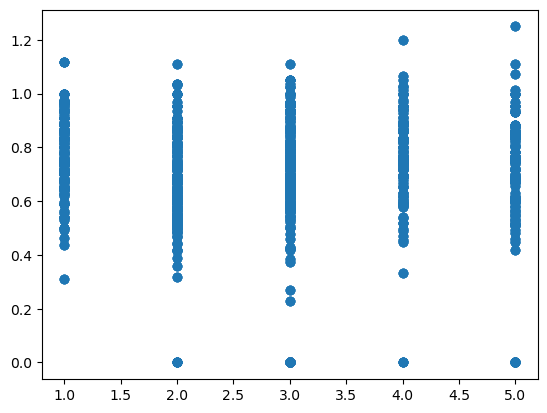

In [74]:
for ind in skillsIDs:
    formsindex = -1
    for i in range(0,len(accuracysSid[str(ind)])):
        if i == delimiters[str(ind)][formsindex]:
            formsindex += 1
        if accuracysSid[str(ind)][i] != -1:
            y.append(accuracysSid[str(ind)][i])
            x.append(skillsIDs[ind][formsindex])

plt.scatter(x,y)
plt.show()

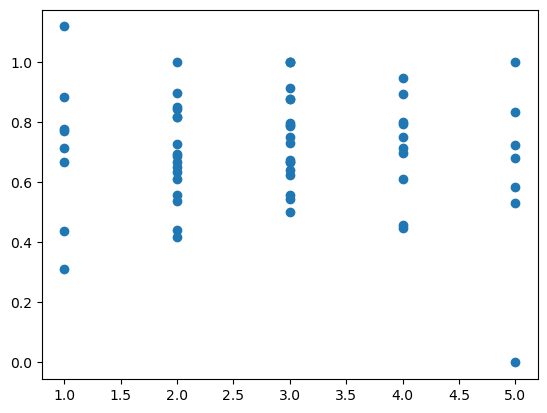

In [75]:
x_infinite = []
y_infinite = []

x_pistol = []
y_pistol = []

x_shotgun = []
y_shotgun = []

x_lanzallamas = []
y_lanzallamas = []

x_sniper = []
y_sniper = []

x_rafagas = []
y_rafagas = []

x_metralleta = []
y_metralleta = []

x_bazooka = []
y_bazooka = []

x_grenadelauncher = []
y_grenadelauncher = []

x_minigun = []
y_minigun = []

for ind in skillsIDs:
    formsindex = -1
    for i in range(0,len(accuracysSid[str(ind)])):
        if i == delimiters[str(ind)][formsindex]:
                formsindex += 1
        if "Infite" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_infinite.append(accuracysSid[str(ind)][i])
                x_infinite.append(skillsIDs[ind][formsindex])
        if "Pistol" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_pistol.append(accuracysSid[str(ind)][i])
                x_pistol.append(skillsIDs[ind][formsindex])
        if "Shotgun" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_shotgun.append(accuracysSid[str(ind)][i])
                x_shotgun.append(skillsIDs[ind][formsindex])
        if "Lanzallamas" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_lanzallamas.append(accuracysSid[str(ind)][i])
                x_lanzallamas.append(skillsIDs[ind][formsindex])
        if "Sniper" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_sniper.append(accuracysSid[str(ind)][i])
                x_sniper.append(skillsIDs[ind][formsindex])
        if "Rafagas" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_rafagas.append(accuracysSid[str(ind)][i])
                x_rafagas.append(skillsIDs[ind][formsindex])
        if "Metralleta" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_metralleta.append(accuracysSid[str(ind)][i])
                x_metralleta.append(skillsIDs[ind][formsindex])
        if "Bazooka" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_bazooka.append(accuracysSid[str(ind)][i])
                x_bazooka.append(skillsIDs[ind][formsindex])
        if "GrenadeLauncher" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_grenadelauncher.append(accuracysSid[str(ind)][i])
                x_grenadelauncher.append(skillsIDs[ind][formsindex])
        if "Minigun" in weaponsIDs[str(ind)][i]:
            if accuracysSid[str(ind)][i] != -1:
                y_minigun.append(accuracysSid[str(ind)][i])
                x_minigun.append(skillsIDs[ind][formsindex])

plt.scatter(x_infinite,y_infinite)
plt.show()

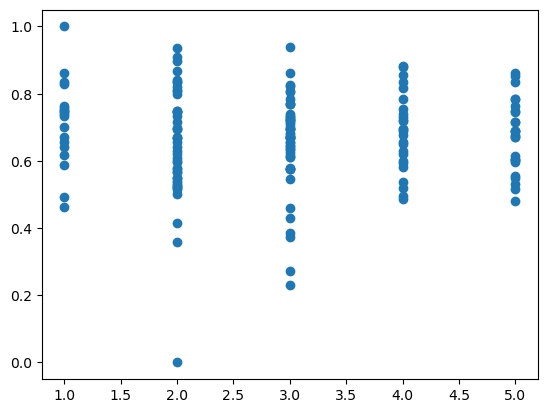

In [76]:
plt.scatter(x_pistol,y_pistol)
plt.show()

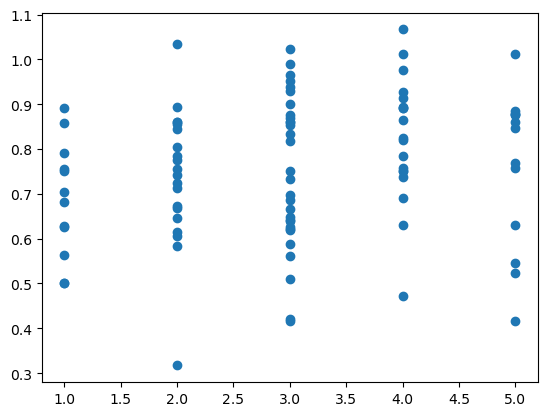

In [77]:
plt.scatter(x_shotgun,y_shotgun)
plt.show()

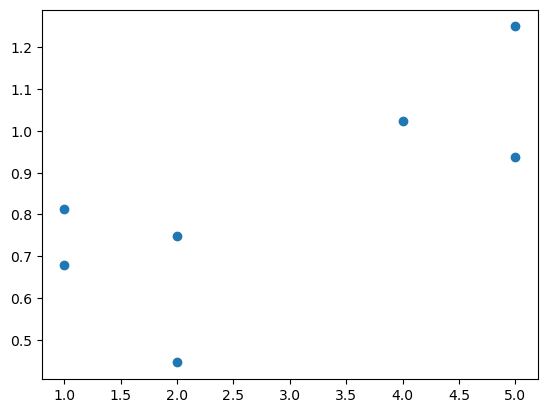

In [78]:
plt.scatter(x_lanzallamas,y_lanzallamas)
plt.show()

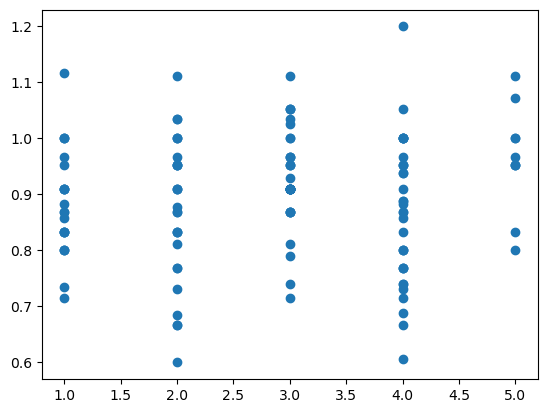

In [79]:
plt.scatter(x_sniper,y_sniper)
plt.show()

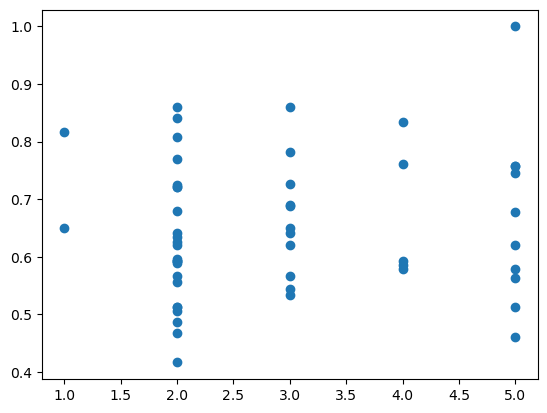

In [81]:
plt.scatter(x_rafagas,y_rafagas)
plt.show()

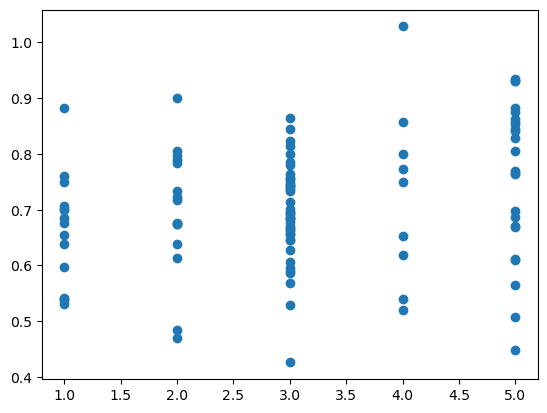

In [82]:
plt.scatter(x_metralleta,y_metralleta)
plt.show()

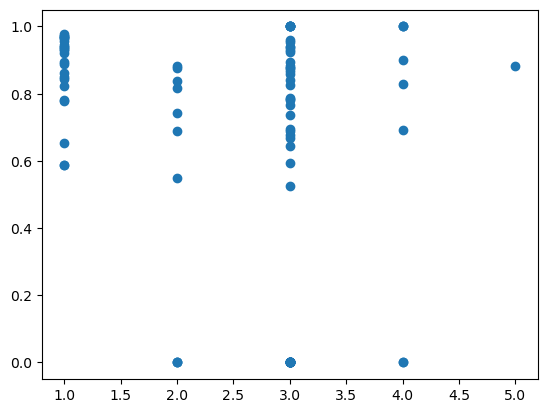

In [83]:
plt.scatter(x_bazooka,y_bazooka)
plt.show()

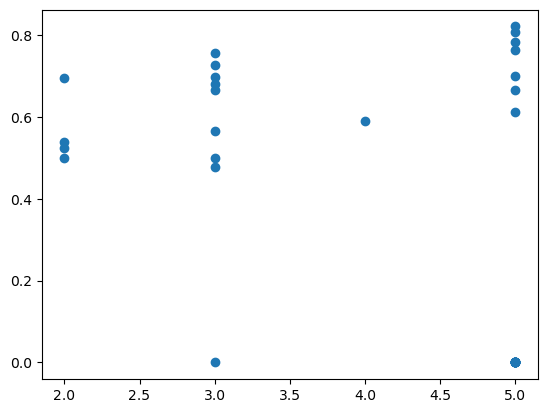

In [85]:
plt.scatter(x_grenadelauncher,y_grenadelauncher)
plt.show()

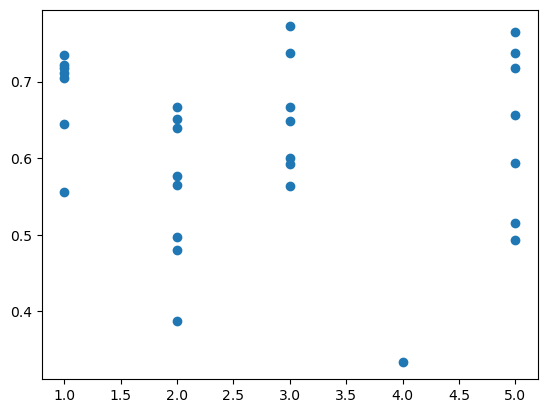

In [86]:
plt.scatter(x_minigun,y_minigun)
plt.show()